## Machine Learning Online Class
  Exercise 5 | Regularized Linear Regression and Bias-Variance

Instructions

------------

  This file contains code that helps you get started on the
  exercise. You will need to complete the following functions:

     linearRegCostFunction.m
     learningCurve.m
     validationCurve.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
sys.path.append('../')
from ex5.featureNormalize import featureNormalize
from ex5.learningCurve import learningCurve
from ex5.linearRegCostFunction import linearRegCostFunction
from ex5.plotFit import plotFit
from ex5.polyFeatures import polyFeatures
from ex5.trainLinearReg import trainLinearReg
from ex5.validationCurve import validationCurve


In [2]:
# =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment and plot the data.

# Load Training Data
print('Loading and Visualizing Data ...')

# Load from ex5data1:
# You will have X, y, Xval, yval, Xtest, ytest in your environment
data = loadmat('ex5data1.mat')
X, y, Xval, yval, Xtest, ytest = data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']

list(map(np.shape, [X, y, Xval, yval, Xtest, ytest]))

Loading and Visualizing Data ...


[(12, 1), (12, 1), (21, 1), (21, 1), (21, 1), (21, 1)]

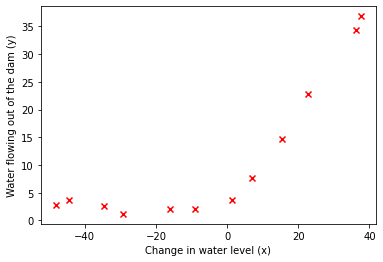

In [3]:
# m = Number of examples
m = X.shape[0]

# Plot training data
plt.scatter(x=X, y=y, c='red', marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [4]:
# =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear
#  regression.
#

theta = np.array([[1, 1]])
J, _ = linearRegCostFunction(np.insert(X, 0, np.ones(m), axis=1), y, theta, 1)

print('Cost at theta = [1  1]: %f ' % J)
print('\n(this value should be about 303.993192)')

Cost at theta = [1  1]: 303.993192 

(this value should be about 303.993192)


In [5]:
# =========== Part 3: Regularized Linear Regression Gradient =============
# You should now implement the gradient for regularized linear regression.

theta = np.ones((1, 2))
[J, grad] = linearRegCostFunction(np.insert(X, 0, np.ones(m), axis=1), y, theta, 1)
print('Gradient at theta = [1  1]: ', end="")
print(np.round(grad, decimals=6))
print('(this value should be about [-15.303016 598.250744])')

print('Program paused. Press enter to continue.')

Gradient at theta = [1  1]: [[-15.303016 598.250744]]
(this value should be about [-15.303016 598.250744])
Program paused. Press enter to continue.


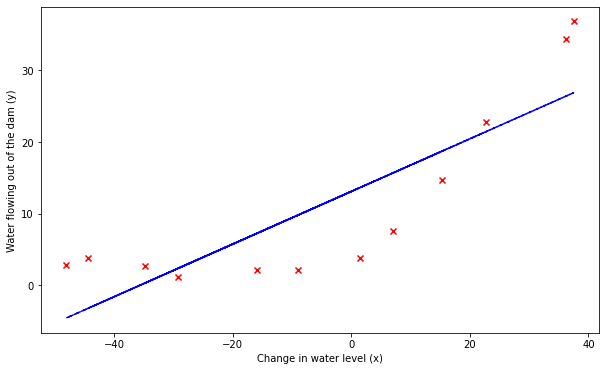

In [6]:
# =========== Part 4: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train
#  regularized linear regression.
#
#  Write Up Note: The data is non-linear, so this will not give a great fit.

#  Train linear regression with lambda = 0
_lambda = 0
result = trainLinearReg(np.insert(X, 0, np.ones(m), axis=1), y, _lambda)

theta = result.x

# Plot fit over the data
plt.figure(figsize=(10, 6))
plt.scatter(x=X, y=y, c='red', marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X,
         np.insert(X, 0, np.ones(m), axis=1) @ theta,
         'b--')  # MATLAB的源码要求用--样式...
# plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)

plt.show()

In [7]:
# =========== Part 5: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function.
#
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- Figure 3 in ex5.pdf

_lambda = 0
error_train, error_val = learningCurve(
    np.insert(X, 0, np.ones(m), axis=1), y,
    np.insert(Xval, 0, np.ones(Xval.shape[0]), axis=1), yval, 
    _lambda)
error_train, error_val

(array([1.01769539e-18, 3.46657146e-09, 3.28659505e+00, 2.84267769e+00,
        1.31540488e+01, 1.94439625e+01, 2.00985217e+01, 1.81728587e+01,
        2.26094054e+01, 2.32614616e+01, 2.43172496e+01, 2.23739065e+01]),
 array([205.12109571, 110.30264058,  45.01023145,  48.36891083,
         35.86516477,  33.82996165,  31.9709859 ,  30.8624462 ,
         31.13599794,  28.93620747,  29.55143162,  29.43381813]))

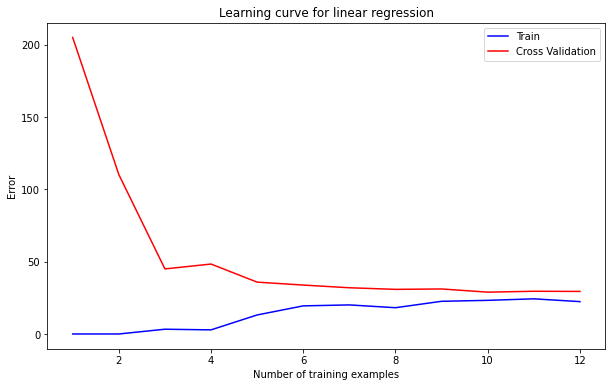

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


In [8]:
# plot(1:m, error_train, 1:m, error_val)
plt.figure(figsize=(10, 6))
plt.plot(range(1, m + 1), error_train, 'b', label='Train')
plt.plot(range(1, m + 1), error_val, 'r', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Learning curve for linear regression')
plt.legend()
plt.show()

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t{}\t\t{:.6f}\t{:.6f}'.format(i+1, error_train[i], error_val[i]))

In [9]:
# =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers
#

p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.insert(X_poly, 0, np.ones(m), axis=1)  # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
Xptm = X_poly_test.shape[0]
X_poly_test -= np.tile(mu, (Xptm, 1))
X_poly_test /= np.tile(sigma, (Xptm, 1))
X_poly_test = np.insert(X_poly_test, 0, np.ones(Xptm), axis=1)  # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
Xpvm = X_poly_test.shape[0]
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= np.tile(mu, (Xpvm, 1))
X_poly_val /= np.tile(sigma, (Xpvm, 1))
X_poly_val = np.insert(X_poly_val, 0, np.ones(Xptm), axis=1)  # Add Ones

print('Normalized Training Example 1:')
print(np.round(X_poly[0, :], decimals=6))

Normalized Training Example 1:
[ 1.       -0.378244 -0.788662  0.190329 -0.737591  0.320252 -0.617152
  0.359835 -0.531091]


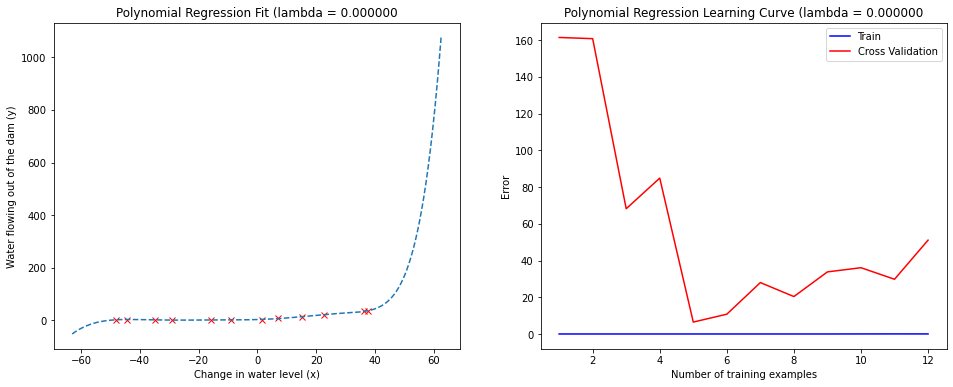

Polynomial Regression (lambda = 0.000000

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	161.442168
  	2		0.000000	160.792292
  	3		0.000000	68.190924
  	4		0.000000	84.863965
  	5		0.000000	6.477097
  	6		0.000000	10.776262
  	7		0.000000	27.982039
  	8		0.000004	20.371517
  	9		0.000357	33.802351
  	10		0.022928	36.079229
  	11		0.034310	29.789664
  	12		0.028977	51.080435


In [10]:
# =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of lambda. The code below runs polynomial regression with
#  lambda = 0. You should try running the code with different values of
#  lambda to see how the fit and learning curve change.

_lambda = 0
result = trainLinearReg(X_poly, y, _lambda)
theta = result.x
# Plot training data and fit

fig = plt.figure(figsize=(16, 6))
# 图一 过拟合
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(X, y, 'rx')
plotFit(min(X), max(X), mu, sigma, theta, p, ax1)
ax1.set_xlabel('Change in water level (x)')
ax1.set_ylabel('Water flowing out of the dam (y)')
ax1.set_title('Polynomial Regression Fit (lambda = {:.6f}'.format(_lambda))
# 图二
ax2 = fig.add_subplot(1, 2, 2)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, _lambda)
ax2.plot(range(1, m + 1), error_train, 'b', label='Train')
ax2.plot(range(1, m + 1), error_val, 'r', label='Cross Validation')
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('Error')
ax2.set_title(
    'Polynomial Regression Learning Curve (lambda = {:.6f}'.format(_lambda))
ax2.legend()
plt.show()
print('Polynomial Regression (lambda = {:.6f}\n'.format(_lambda))
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t{}\t\t{:.6f}\t{:.6f}'.format( i+1, error_train[i], error_val[i]))

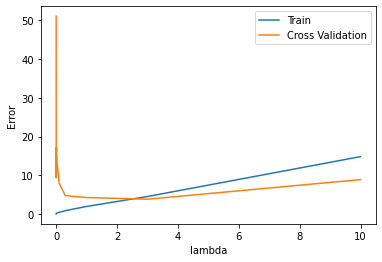

lambda		Train Error	Validation Error
 0.000000	0.028977	51.080435
 0.001000	0.107995	9.366996
 0.003000	0.166765	15.933637
 0.010000	0.217960	17.146479
 0.030000	0.275140	13.215764
 0.100000	0.438653	7.926808
 0.300000	0.868149	4.760846
 1.000000	1.958691	4.263348
 3.000000	4.525119	3.832178
 10.000000	14.825808	8.889724


In [11]:
# =========== Part 8: Validation for Selecting Lambda =============
#  You will now implement validationCurve to test various values of
#  lambda on a validation set. You will then use this to select the
#  "best" lambda value.

lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)
plt.plot(lambda_vec, error_train, label='Train')
plt.plot(lambda_vec, error_val, label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' {:.6f}\t{:.6f}\t{:.6f}'.format(lambda_vec[i], error_train[i],
                                           error_val[i]))